In [ ]:
library(caret)

#Load dataset
data(iris)
dataset = iris

In [ ]:
#Create a dataset using 80% of rows
validation_index = createDataPartition(dataset$Species, p=0.80, list=FALSE)

#Selet 20% of the dataset for validation
validation = dataset[-validation_index,]

#Use the remaining 80% of the dataset for training and testing
dataset = dataset[validation_index,]

#Show dimesions of dataset
dim(dataset)

#List types for each atribute
sapply(dataset, class)

#Show first 5 rows of dataset
head(dataset)

#List the levels for each class
levels(dataset$Species)

#Summarize class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

# summarize attribute distributions
summary(dataset)

In [ ]:
#Define x and y
x = dataset[,1:4]
y = dataset[,5]

#Create a boxplot for each attribute
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

#Create a barplot for class breakdown
plot(y)

In [ ]:
#Create scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

In [ ]:
#Create boxplots for each attribute
featurePlot(x=x, y=y, plot="box")

In [ ]:
#Create density plots for each attribute by class value
scales = list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min. 1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  1.0000000       1      1 1.0000000       1    1    0
cart 0.6666667       1      1 0.9666667       1    1    0
knn  1.0000000       1      1 1.0000000       1    1    0
svm  0.8000000       1      1 0.9800000       1    1    0
rf   1.0000000       1      1 1.0000000       1    1    0

Kappa 
          Min. 1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  1.0000000       1      1 1.0000000       1    1    0
cart 0.5000000       1      1 0.9500000       1    1    0
knn  1.0000000       1      1 1.0000000       1    1    0
svm  0.7058824       1      1 0.9705882       1    1    0
rf   1.0000000       1      1 1.0000000       1    1    0


Linear Discriminant Analysis 

36 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 33, 33, 31, 33, 32, 33, ... 
Resampling results:

  Accuracy  Kappa
  1         1    



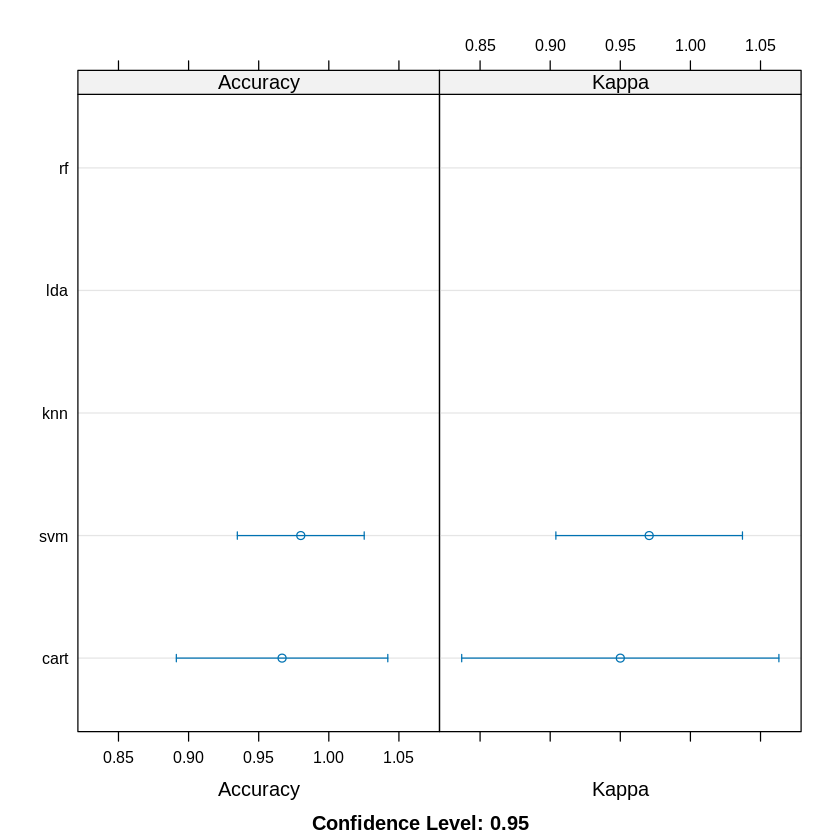

In [27]:
#Run algorithms using 10-fold cross validation
control = trainControl(method="cv", number=10)
metric = "Accuracy"

#Linear algorithms
set.seed(7)
fit.lda = train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

#Nonlinear algorithms
# CART
set.seed(7)
fit.cart = train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

# kNN
set.seed(7)
fit.knn = train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

#Advanced algorithms
# SVM
set.seed(7)
fit.svm = train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

# Random Forest
set.seed(7)
fit.rf = train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

#Summarize accuracy of models
results = resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

#Compare accuracy of models
dotplot(results)

Linear Discriminant Analysis 

36 samples
 4 predictor
 3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 33, 33, 31, 33, 32, 33, ... 
Resampling results:

  Accuracy  Kappa
  1         1    

